<a href="https://colab.research.google.com/github/Wirtix/flight_price_ML/blob/main/flight_price_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data import

In [14]:
import pandas as pd

df = pd.read_csv('Clean_Dataset.csv')

## Data exploration

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [16]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [17]:
df.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [18]:
df['airline'].value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [19]:
df['destination_city'].value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [20]:
df.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [21]:
df['arrival_time'].value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [22]:
df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

## Preprocessing

In [23]:
df = df.drop(['Unnamed: 0'], axis=1)
df = pd.concat([df.drop('airline', axis=1), pd.get_dummies(df['airline'], dtype=int, drop_first=True).add_prefix('airline_')], axis = 1)
df = df.drop(['flight'], axis=1)
df = pd.concat([df.drop('source_city', axis=1), pd.get_dummies(df['source_city'], dtype=int, drop_first=True).add_prefix('source_city_')], axis = 1)
df = pd.concat([df.drop('arrival_time', axis=1), pd.get_dummies(df['arrival_time'], dtype=int, drop_first=True).add_prefix('arrival_time_')], axis = 1)
df = pd.concat([df.drop('departure_time', axis=1), pd.get_dummies(df['departure_time'], dtype=int, drop_first=True).add_prefix('departure_time_')], axis = 1)
df = pd.concat([df.drop('destination_city', axis=1), pd.get_dummies(df['destination_city'], dtype=int, drop_first=True).add_prefix('destination_city_')], axis = 1)
df = pd.concat([df.drop('class', axis=1), pd.get_dummies(df['class'], dtype=int, drop_first=True).add_prefix('class_')], axis = 1)

mapping = {
    'zero': 0,
    'one': 1,
    'two_or_more': 2
}

df['stops'] = df['stops'].map(mapping)


In [24]:
df

,stops,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,...,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy
0,0,2.17,1,5953,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,1
1,0,2.33,1,5953,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
2,0,2.17,1,5956,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,0,2.25,1,5955,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,1
4,0,2.33,1,5955,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,10.08,49,69265,0,0,0,0,1,1,...,0,0,1,0,0,0,1,0,0,0
300149,1,10.42,49,77105,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
300150,1,13.83,49,79099,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
300151,1,10.00,49,81585,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 30 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   stops                         300153 non-null  int64  
 1   duration                      300153 non-null  float64
 2   days_left                     300153 non-null  int64  
 3   price                         300153 non-null  int64  
 4   airline_Air_India             300153 non-null  int64  
 5   airline_GO_FIRST              300153 non-null  int64  
 6   airline_Indigo                300153 non-null  int64  
 7   airline_SpiceJet              300153 non-null  int64  
 8   airline_Vistara               300153 non-null  int64  
 9   source_city_Chennai           300153 non-null  int64  
 10  source_city_Delhi             300153 non-null  int64  
 11  source_city_Hyderabad         300153 non-null  int64  
 12  source_city_Kolkata           300153 non-nul

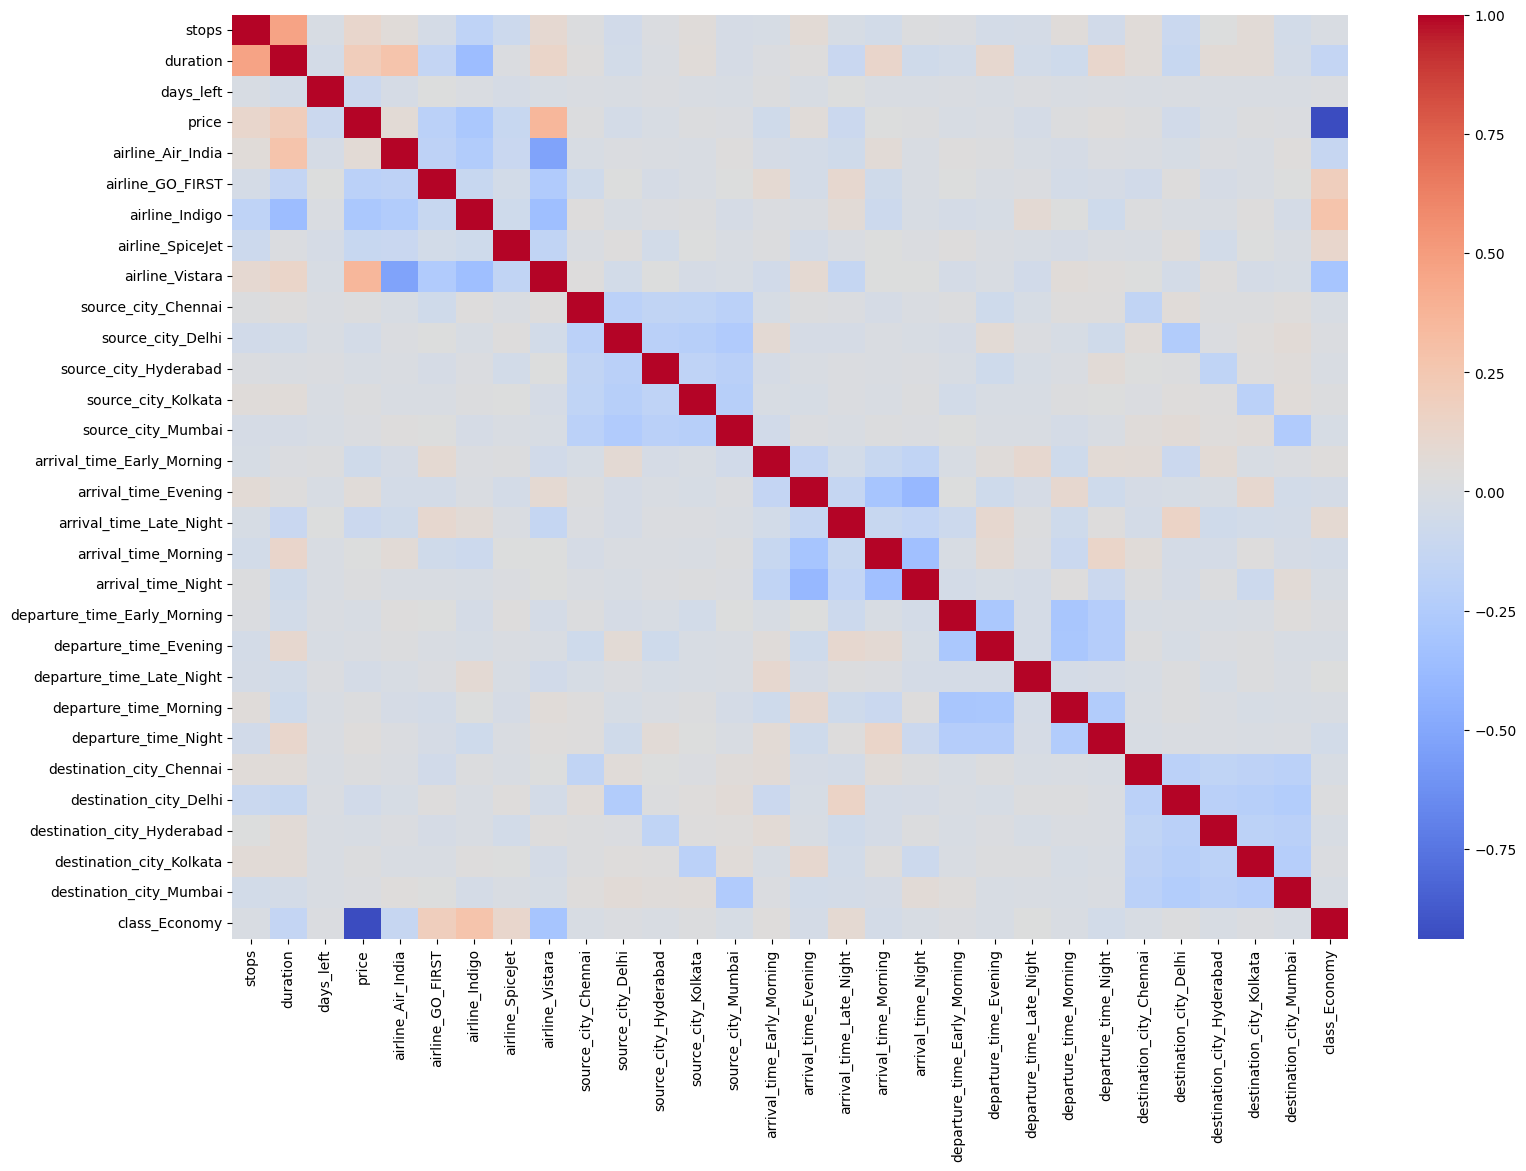

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.show()

In [27]:
correlations = df.corr()['price'].abs()
sorted_correlations = correlations.sort_values()
num_cols_to_drop = int(0.5 * len(df.columns))
cols_to_drop = sorted_correlations.iloc[:num_cols_to_drop].index
df_dropped = df.drop(cols_to_drop, axis=1)

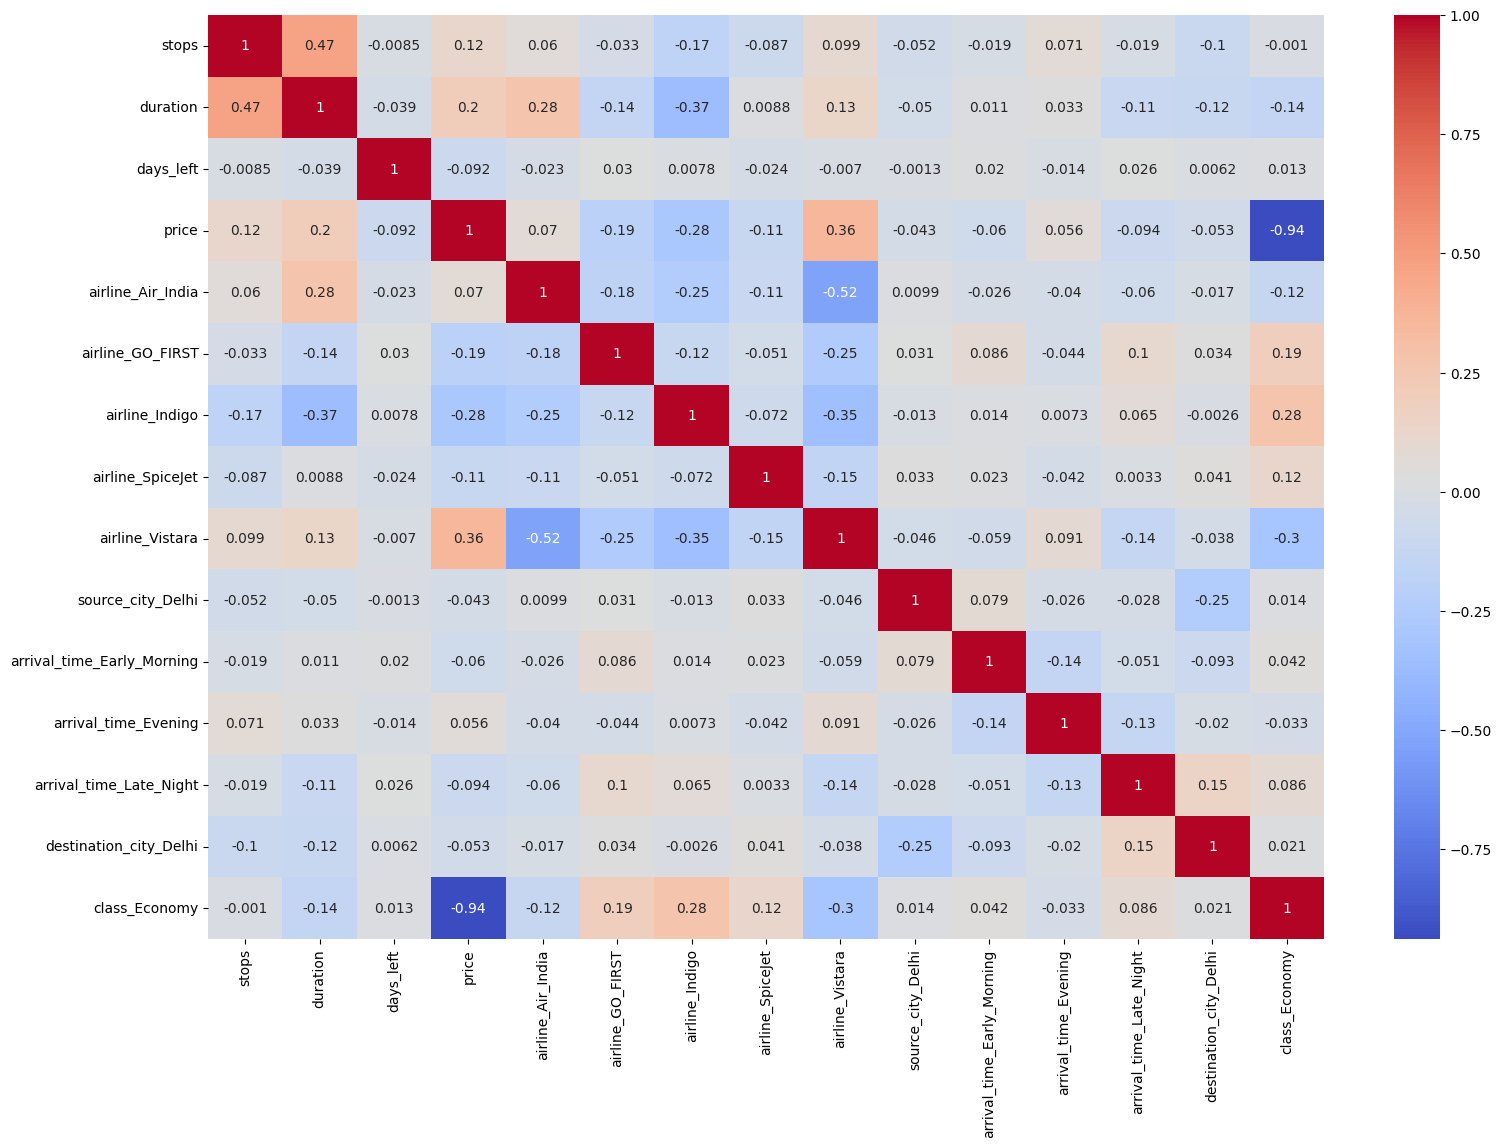

In [28]:
plt.figure(figsize=(18,12))
sns.heatmap(df_dropped.corr(), annot=True, cmap='coolwarm')
plt.show()

## trainign regression model

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X, y = df.drop('price', axis=1), df['price']


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [31]:
reg = RandomForestRegressor()

reg.fit(X_train, y_train)

RandomForestRegressor()

In [32]:
reg.score(X_test, y_test)

0.9850549447362299

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

y_pred = reg.predict(X_test)

print('r2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y_test, y_pred)))

r2: 0.9850549447362299
MAE: 1079.3206412909608
MSE: 7669375.176820955
RMSE: 2769.3636772408486


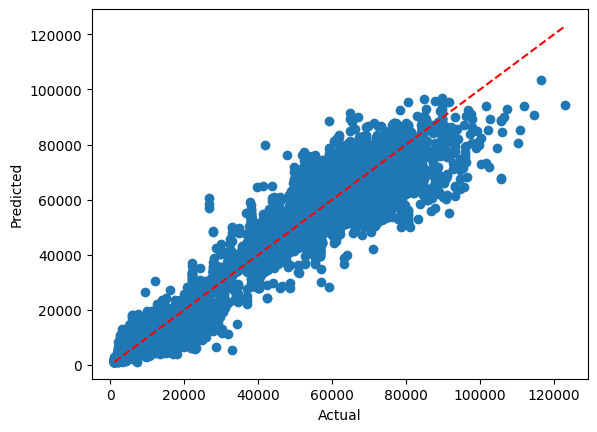

In [38]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [41]:
importances = dict(zip(X.columns, reg.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key=lambda item: item[1], reverse=True)}
importances

{'class_Economy': 0.8801714445649234,
 'duration': 0.05845568722053042,
 'days_left': 0.018644999622813845,
 'airline_Vistara': 0.005161291143391494,
 'airline_Air_India': 0.005014113373047144,
 'source_city_Delhi': 0.003823987525145138,
 'destination_city_Delhi': 0.0036155185881072247,
 'source_city_Mumbai': 0.002337188355946718,
 'destination_city_Mumbai': 0.0021870039146406556,
 'source_city_Kolkata': 0.001918715220042253,
 'destination_city_Hyderabad': 0.0018933436945965394,
 'destination_city_Kolkata': 0.001874201988462342,
 'stops': 0.0017820412840004402,
 'source_city_Hyderabad': 0.001612484424474352,
 'arrival_time_Evening': 0.0015978676827814442,
 'arrival_time_Night': 0.0013749060765860044,
 'source_city_Chennai': 0.001212121091544819,
 'departure_time_Morning': 0.0011530436871654418,
 'destination_city_Chennai': 0.001143930241039201,
 'departure_time_Evening': 0.0011334411489762463,
 'departure_time_Early_Morning': 0.0009219893837229138,
 'departure_time_Night': 0.0009207990

### takes to long

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

In [ ]:


best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [53]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

parm_dist = {
    'n_estimators': randint(100,300),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2,11),
    'min_samples_leaf': randint(1, 5)
}
reg = RandomForestRegressor()
random_search = RandomizedSearchCV(estimator=reg, param_distributions=parm_dist, n_iter=2, cv=3,
                                   scoring = 'neg_mean_squared_error', verbose=2, random_state=10, n_jobs=-1)
random_search.fit(X_train, y_train)


Fitting 3 folds for each of 2 candidates, totalling 6 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=2, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30, 40, 50],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78ea5eb4ff40>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78ea5eb4e5c0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78ea5e7f1ba0>},
                   random_state=10, scoring='neg_mean_squared_error',
                   verbose=2)

In [54]:
best_regressor = random_search.best_estimator_


In [55]:
best_regressor.score(X_test, y_test)

0.9859360832553296

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

y_pred = best_regressor.predict(X_test)

print('r2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y_test, y_pred)))

r2: 0.9859360832553296
MAE: 1093.2382038722035
MSE: 7217200.074992725
RMSE: 2686.4847058922046


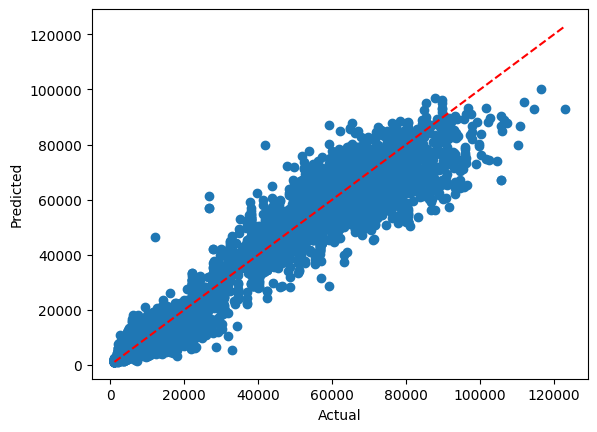

In [57]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()